In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from _src import PublicAnalysis,\
                    Calculator

file_path = "data/apt_1.xlsx"
anal = PublicAnalysis(file_path)

## 데이터 소개
- 해당 데이터는 108가구의 1년치 월 별 사용량 데이터를 가지고 있는 데이터이다.
- 이 중, 1월달 데이터를 이용하여 공용부의 전기요금 구성요소들의 특징을 살펴보도록 한다.

In [3]:
anal.set_init()
anal.meter_year.iloc[:, :10]

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801
1,99,10,23,40,39,197,218,228,84,223
2,94,77,18,135,30,192,201,230,154,188
3,96,77,20,169,28,216,231,241,247,232
4,75,76,30,127,58,217,226,232,250,209
5,165,150,161,7,75,164,216,224,200,189
6,186,148,108,6,48,182,211,225,192,192
7,292,136,273,6,52,247,375,306,253,287
8,311,7,240,6,49,318,390,345,271,319
9,173,7,98,6,41,231,214,239,183,193
10,149,7,30,8,35,200,202,209,193,224


In [4]:
anal.select_month() # Default Value : 1
anal.meter_month.iloc[:5]

,name,usage (kWh)
0,아파트1-104-1206,99
1,아파트1-104-303,10
2,아파트1-104-1307,23
3,아파트1-104-1208,40
4,아파트1-104-408,39


In [5]:
anal.set_bill_table(public_percentage=30)
anal.set()
anal.bill_table.get

,기본요금,전력량요금,기후환경요금,연료비조정액,부가가치세,전력산업기반기금,최종청구금액
APT,654480,4907088,235224,-133164,566352,209520,6438960
세대부,197480,3118820,164805,-93312,334205,123150,3798980
공용부,457000,1788268,70419,-39852,232147,86370,2594352
실제 공용부 값,0,0,0,0,0,0,2639980
오차,0,0,0,0,0,0,45628


## 기본요금

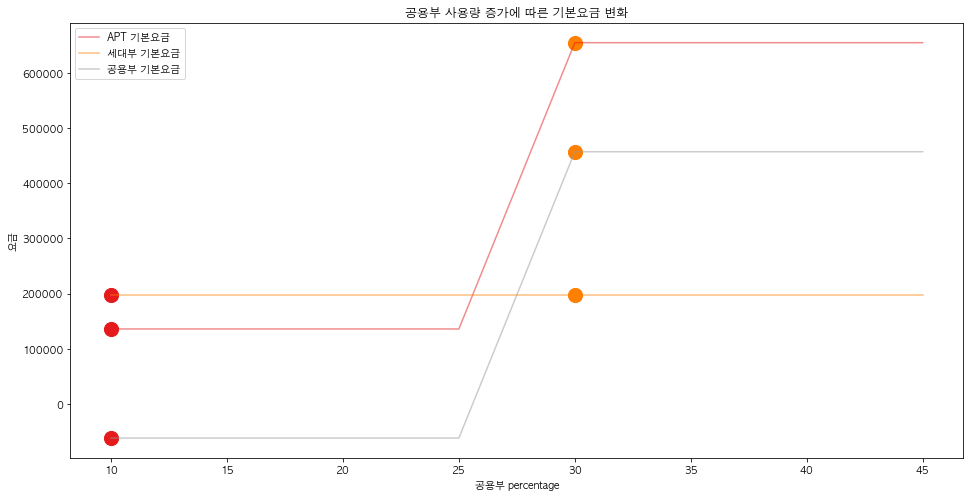

,10%,15%,20%,25%,30%,35%,40%,45%
APT 기본요금,136080.0,136080.0,136080.0,136080.0,654480.0,654480.0,654480.0,654480.0
세대부 기본요금,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0
공용부 기본요금,-61400.0,-61400.0,-61400.0,-61400.0,457000.0,457000.0,457000.0,457000.0
APT 평균사용량,320.0,339.0,360.0,384.0,411.0,443.0,480.0,524.0


In [70]:
basic_anal = anal.basic.get_percentage(var_point=True, inc=5)
basic_anal.iloc[:, :10]

### Feature 1. APT 평균사용량 누진구간 변화로 인한 공용부 기본요금 증가

In [71]:
basic_anal.iloc[:, :10]

,10%,15%,20%,25%,30%,35%,40%,45%
APT 기본요금,136080.0,136080.0,136080.0,136080.0,654480.0,654480.0,654480.0,654480.0
세대부 기본요금,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0,197480.0
공용부 기본요금,-61400.0,-61400.0,-61400.0,-61400.0,457000.0,457000.0,457000.0,457000.0
APT 평균사용량,320.0,339.0,360.0,384.0,411.0,443.0,480.0,524.0


### Feature 2. 세대부 사용량 구성에 따라 달라지는 공용부의 기본요금
- APT 기본요금 * 가구 수로 만들어지는 아파트 전체 기본요금에 대해, 공용부 기본요금을 0원으로 만들기 위해서는 모든 가구가 APT 평균사용량 만큼의 사용량을 보여주면서 APT 평균사용량에 의해 만들어지는 기본요금을 수거해가야한다.

In [72]:
anal.basic.get_step_count()

,가구 수,기본요금,토탈
누진단계,,,
0,20,730,14600
1,73,1260,91980
2,15,6060,90900
세대부 토탈,108,8050,197480


## 전력량요금

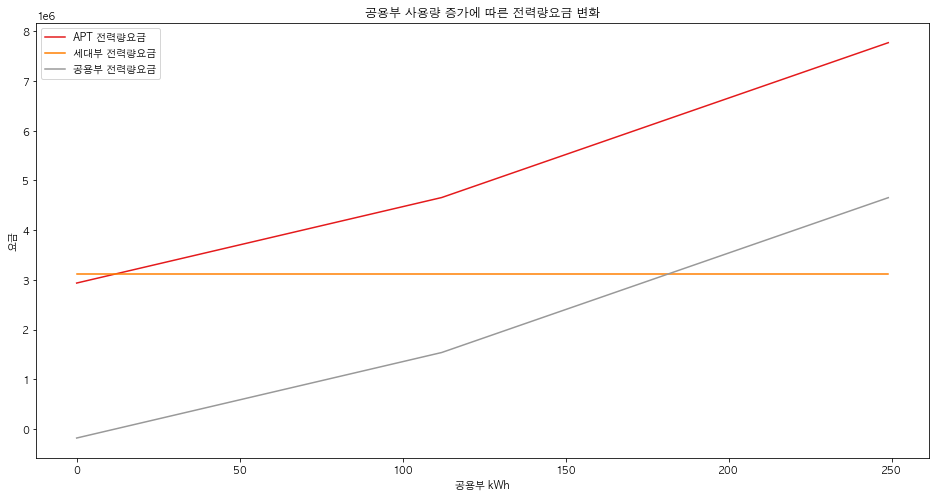

,0kWh,1kWh,2kWh,3kWh,4kWh,5kWh,6kWh,7kWh,8kWh,9kWh
APT 전력량요금,2935656,2950992,2966436,2981772,2997108,3012444,3027888,3043224,3058560,3074004
세대부 전력량요금,3118820,3118820,3118820,3118820,3118820,3118820,3118820,3118820,3118820,3118820
공용부 전력량요금,-183164,-167828,-152384,-137048,-121712,-106376,-90932,-75596,-60260,-44816


In [90]:
anal.elec_rate.get_kwh().iloc[:, :10]

### 공용부 평균사용량 0kWh eq. 공용부 전력량요금 시작값

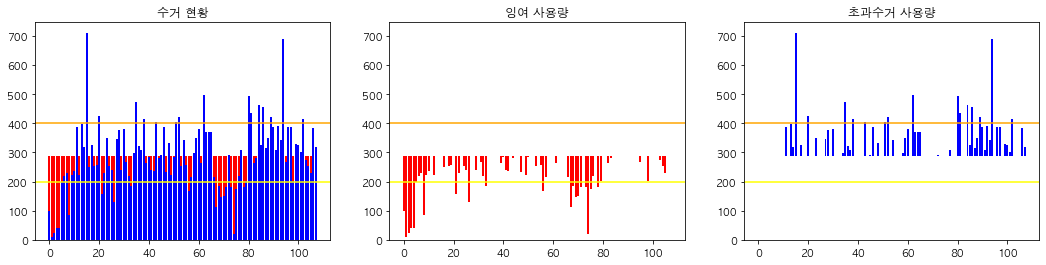

In [85]:
anal.elec_rate.col_monitor()

In [86]:
anal.elec_rate.col_table()

,누진 1단계,누진 2단계,누진 3단계
수거 필요 사용량,21600,9504,0
수거 사용량,20061,9916,1127
잉여 사용량,1539,3358,0
초과수거 사용량,0,3770,1127


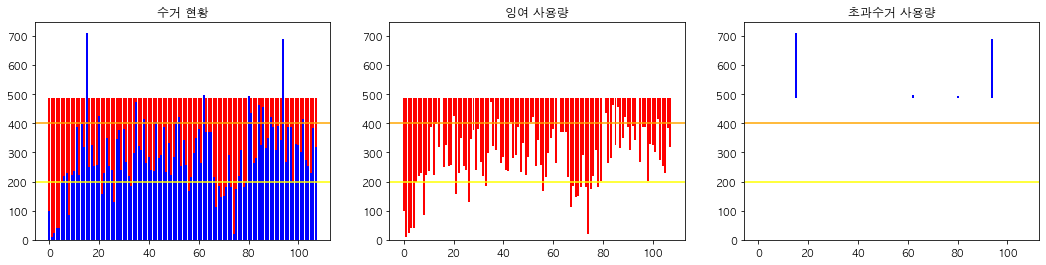

In [87]:
anal.elec_rate.col_monitor(public_mean_kwh=200)

In [88]:
anal.elec_rate.col_table()

,누진 1단계,누진 2단계,누진 3단계
수거 필요 사용량,21600,21600,9504
수거 사용량,20061,9916,1127
잉여 사용량,1539,11684,8817
초과수거 사용량,0,0,440


### 공용부 평균사용량의 증가는 APT 평균사용량의 증가와 같다  eq.공용부 1kWh증가의 의미

In [164]:
result = anal.elec_rate.get_rolling()
result

,현재 전력량요금,다음 전력량요금,누진단계,오차,1가구 당 오차
0kWh,-183164,-167828,1,15336,142.0
1kWh,-167828,-152384,1,15444,143.0
2kWh,-152384,-137048,1,15336,142.0
3kWh,-137048,-121712,1,15336,142.0
4kWh,-121712,-106376,1,15336,142.0
...,...,...,...,...,...
244kWh,4540432,4563112,2,22680,210.0
245kWh,4563112,4585900,2,22788,211.0
246kWh,4585900,4608688,2,22788,211.0
247kWh,4608688,4631368,2,22680,210.0


In [165]:
result.groupby(['누진단계', '1가구 당 오차']).mean()

현재 전력량요금      다음 전력량요금       오차
누진단계 1가구 당 오차                                     
1    142.0     6.642760e+05  6.796120e+05  15336.0
     143.0     6.823956e+05  6.978396e+05  15444.0
2    210.0     3.067821e+06  3.090501e+06  22680.0
     211.0     3.096094e+06  3.118882e+06  22788.0